In [25]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

# Create a DataFrame with the scaled data and set the "coin_id" index
scaled_df = pd.DataFrame(scaled_data, index=df_market_data.index, columns=df_market_data.columns)

# Display the first five rows of the scaled DataFrame
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [11]:
# Create a DataFrame with the scaled data
crypto_names = df_market_data.index

# Copy the crypto names from the original data
scaled_df['coin_id'] = crypto_names

# Set the coinid column as index

scaled_df = scaled_df.reset_index(drop=True).set_index('coin_id')

# Display sample data
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [12]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [16]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
for k in k_values:
    kmeans_scaled = KMeans(n_clusters=k, random_state=0)
    kmeans_scaled.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

In [19]:
# 2. Fit the model to the data using `df_market_data_scaled`
# Predict the clusters
clusters_scaled = kmeans_scaled.predict(scaled_df)
# Create a copy of the original scaled DataFrame and add the clusters
scaled_clustered_df = scaled_df.copy()
scaled_clustered_df['cluster'] = clusters_scaled
# 3. Append the model.inertia_ to the inertia list
inertia_values.append(kmeans.inertia_)

In [21]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'inertia': [287.0, 195.82021818036043, 123.19048183836958, 79.02243535120975, 
                65.302379141625, 52.888518219775314, 43.91469044757747, 
                37.517032490103574, 32.485240832183536, 28.222899290608925, 
                24.545512769147678]
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


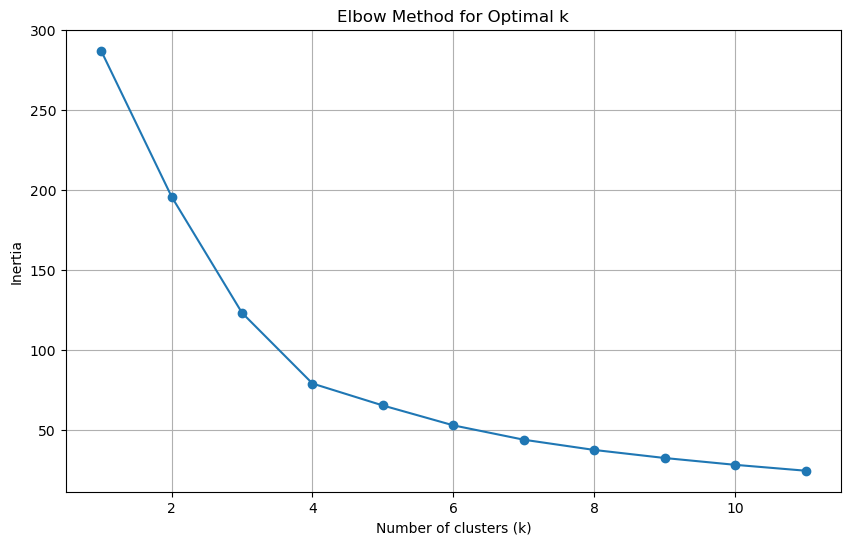

In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

4

### Cluster Cryptocurrencies with K-means Using the Original Data

In [27]:
# Initialize the K-Means model using the best value for k
kmeans_best = KMeans(n_clusters=4, random_state=0)


In [28]:
# Fit the K-Means model using the scaled data
kmeans_best.fit(scaled_df)


KMeans(n_clusters=4, random_state=0)

In [30]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters_best = kmeans_best.predict(scaled_df)


# Print the resulting array of cluster values.
print(clusters_best)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [31]:
# Create a copy of the DataFrame
clustered_df_best = df_market_data.copy()


In [32]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df_best['cluster'] = clusters_best

# Display sample data
clustered_df_best.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [34]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = clustered_df_best.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)'
)
scatter_plot


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [35]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)


In [36]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca_model.fit_transform(scaled_df)
pca_columns = ['PC1', 'PC2', 'PC3']
pca_df = pd.DataFrame(pca_data, columns=pca_columns, index=scaled_df.index)

# View the first five rows of the DataFrame. 
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [37]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
# Create a DataFrame to display the explained variance
explained_variance_df = pd.DataFrame(explained_variance, index=pca_columns, columns=['Explained Variance'])

# Display the explained variance
explained_variance_df

,Explained Variance
PC1,0.371986
PC2,0.347008
PC3,0.176038


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

In [39]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
pca_clustered_df = pd.DataFrame(pca_data, columns=pca_columns, index=scaled_df.index)

# Copy the crypto names from the original data
pca_clustered_df['coin_id'] = df_market_data.index

# Set the coinid column as index
pca_clustered_df = pca_clustered_df.reset_index(drop=True).set_index('coin_id')

# Display sample data
pca_clustered_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [40]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))


In [41]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(pca_clustered_df)
    inertia_values_pca.append(kmeans_pca.inertia_)

In [42]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values_pca, 'inertia': inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

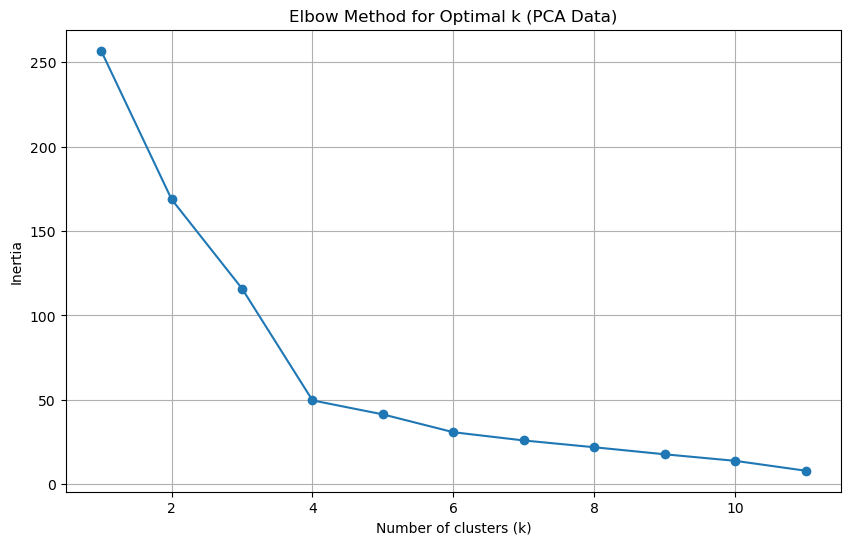

In [43]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 3


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, it is lower.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [44]:
# Initialize the K-Means model using the best value for k
kmeans_pca_best = KMeans(n_clusters=3, random_state=0)


In [45]:
# Fit the K-Means model using the PCA data
kmeans_pca_best.fit(pca_clustered_df)


KMeans(n_clusters=3, random_state=0)

In [47]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca_best = kmeans_pca_best.predict(pca_clustered_df)

# Print the resulting array of cluster values.
clusters_pca_best

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [48]:
# Create a copy of the DataFrame with the PCA data
pca_clustered_df['cluster'] = clusters_pca_best


# Add a new column to the DataFrame with the predicted clusters


# Display sample data
pca_clustered_df.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


/var/folders/8b/7m7r6x_s09n0br47ncq0bt000000gn/T/ipykernel_3811/353490979.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (pca_clustered_df['PC1'][i],
/var/folders/8b/7m7r6x_s09n0br47ncq0bt000000gn/T/ipykernel_3811/353490979.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pca_clustered_df['PC2'][i]),


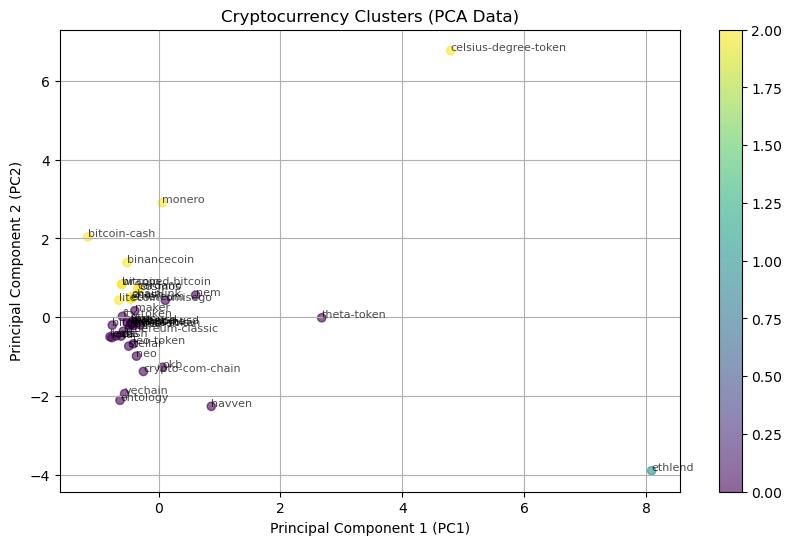

In [49]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# Create a scatter plot using matplotlib
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_clustered_df['PC1'],
    pca_clustered_df['PC2'],
    c=pca_clustered_df['cluster'],
    cmap='viridis',
    alpha=0.6
)

# Adding annotations for hover functionality
for i, coin_id in enumerate(pca_clustered_df.index):
    plt.annotate(coin_id, 
                 (pca_clustered_df['PC1'][i], 
                  pca_clustered_df['PC2'][i]), 
                 fontsize=8, alpha=0.7)

plt.colorbar(scatter)
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Cryptocurrency Clusters (PCA Data)')
plt.grid(True)
plt.show()


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

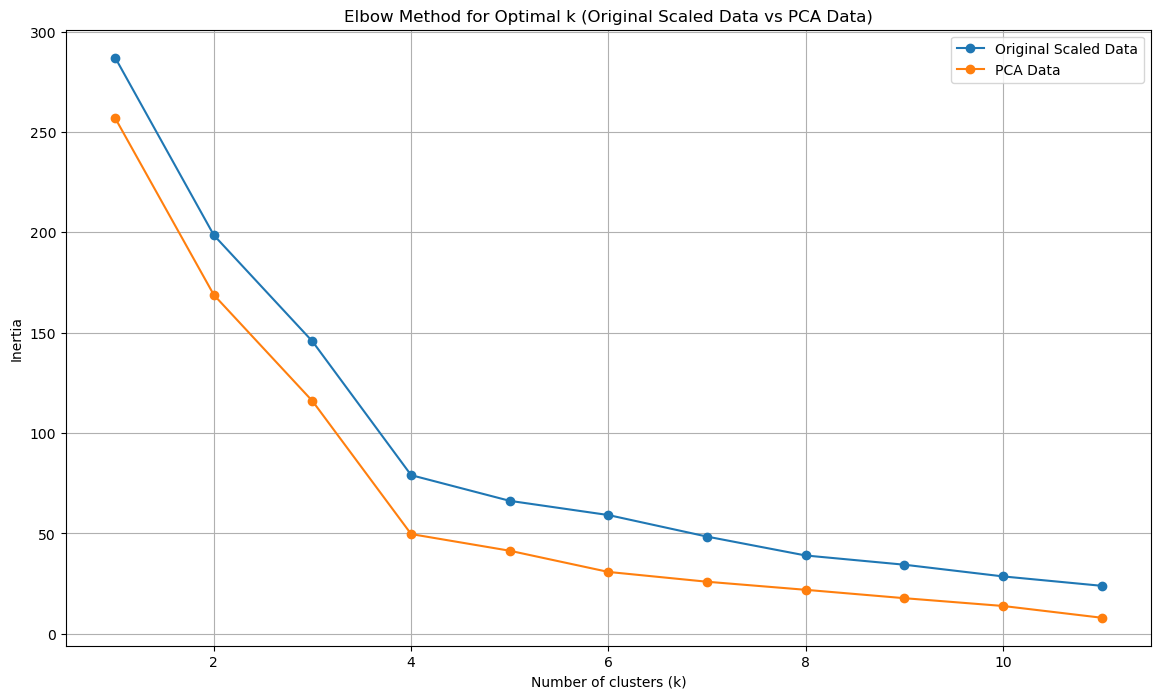

In [50]:
# Composite plot to contrast the Elbow curves
# Compute inertia for original scaled data
inertia_values_scaled = []

for k in range(1, 12):
    kmeans_scaled = KMeans(n_clusters=k, random_state=0)
    kmeans_scaled.fit(scaled_df)
    inertia_values_scaled.append(kmeans_scaled.inertia_)

# Create a DataFrame with the elbow data for original scaled data
elbow_data_scaled = {'k': list(range(1, 12)), 'inertia': inertia_values_scaled}
elbow_df_scaled = pd.DataFrame(elbow_data_scaled)

# Plot the composite elbow curves
plt.figure(figsize=(14, 8))

# Elbow curve for original scaled data
plt.plot(elbow_df_scaled['k'], elbow_df_scaled['inertia'], marker='o', label='Original Scaled Data')

# Elbow curve for PCA data
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o', label='PCA Data')

plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Original Scaled Data vs PCA Data)')
plt.legend()
plt.grid(True)
plt.show()


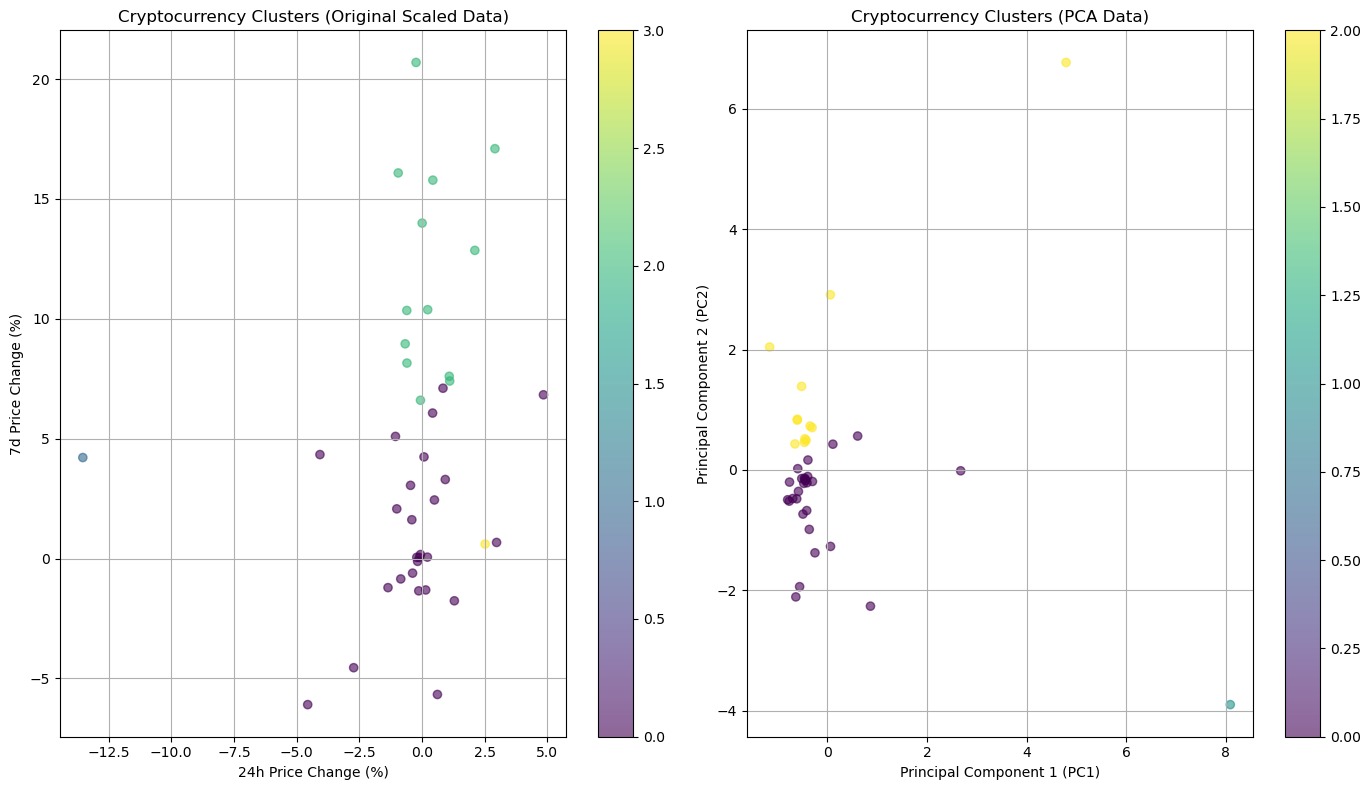

In [51]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
# Create a scatter plot for clusters from the original scaled data
plt.figure(figsize=(14, 8))

# Scatter plot for original scaled data clusters
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(
    clustered_df_best['price_change_percentage_24h'],
    clustered_df_best['price_change_percentage_7d'],
    c=clustered_df_best['cluster'],
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(scatter1)
plt.xlabel('24h Price Change (%)')
plt.ylabel('7d Price Change (%)')
plt.title('Cryptocurrency Clusters (Original Scaled Data)')
plt.grid(True)

# Scatter plot for PCA data clusters
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(
    pca_clustered_df['PC1'],
    pca_clustered_df['PC2'],
    c=pca_clustered_df['cluster'],
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(scatter2)
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Cryptocurrency Clusters (PCA Data)')
plt.grid(True)

plt.tight_layout()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**  It simplifies the data and can reveal broader patterns, which can result in more stable clusters